# Week 1 Assigment

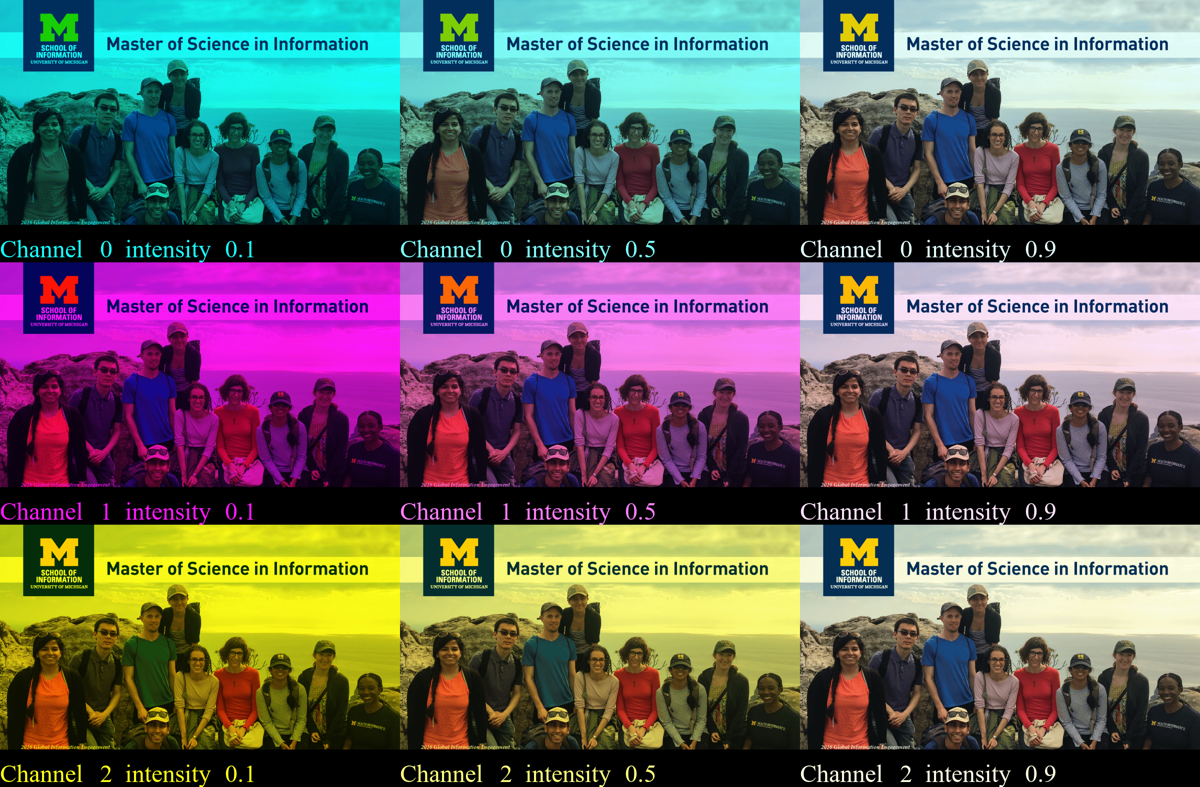

In [190]:
import PIL
from PIL import Image, ImageFont, ImageDraw 
from PIL import ImageEnhance
from IPython.display import display


#downloaded the recruitment flyer image to use it
image=Image.open("C:\\Users\Sorby\Desktop\download.png")
image=image.convert('RGB')

#blank array to store 9 versions of original image
image_arr = []

#specifying the non variable parts of the text to add premptively
font = ImageFont.truetype(r"C:\Users\Sorby\Desktop\times.ttf", 50)  
text1 = 'Channel '
text2 = 'intensity'

#i stored the intensities in an array so i could automate the process of changing the channel intensities inside a loop
width, height = image.size
intens_arr = [0.1, 0.5, 0.9]

#running a loop 9 times, each time a new blank image is created, and the pixel at each point of the
#original image are added to the new blank_image after changing their intensity

for i in range(1, 4):
    for j in range(1, 4):
        #making a blank image 9 times
        blank_img=Image.new(image.mode, (image.width,image.height+75))#ive added some extra size (+75) to make space for the text
        for x in range(width):
            for y in range(height):
                #i store the pixel value at location x, y as a list
                pix = list(image.getpixel((x, y)))
                #according to the loop, the intensity factor is only applied to a specific channel, specified by index value
                #[i-1]
                pix[i-1] = int(pix[i-1] * intens_arr[j-1])
                #after ive processed the pixel value, i put it into the blank imagea at x,y location
                blank_img.putpixel((x, y), tuple(pix))
                
                
                #specifying a completely white rgb value
                textpix = [255, 255, 255]
                #changing pixel value for text according to channel adn intensity
                textpix[i-1] = int(textpix[i-1] * intens_arr[j-1])
                
        #use a Draw object to add the text
        draw = ImageDraw.Draw(blank_img)
        
        #these coordinations for text placement have been obtained by hit and miss method
        draw.text((0, 470), text1, fill = tuple(textpix), font = font, align ="left")
        draw.text((200, 470), str(i-1),  fill = tuple(textpix), font = font, align ="left")
        draw.text((250, 470), text2,  fill = tuple(textpix), font = font, align ="left")
        draw.text((450, 470), str(intens_arr[j-1]),  fill = tuple(textpix), font = font, align ="left")
        
        
        #after all the processing, add the blank image(which is now not so blank) to the array
        image_arr.append(blank_img)

        #creating a new large image for pasting
cnc_sheet=PIL.Image.new(image.mode, ((image.width)*3,(image.height+75)*3))
xoffset = 0
yoffset = 0

#code is same same stub given in assignment beginning, except for changes to y offset to make space for text
for img in image_arr:
    cnc_sheet.paste(img, (xoffset, yoffset) )
    if xoffset+image.width == cnc_sheet.width:
        xoffset=0
        yoffset=yoffset+image.height+75
    else:
        xoffset=xoffset+image.width
cnc_sheet = cnc_sheet.resize((int(cnc_sheet.width/2),int(cnc_sheet.height/2) ))
display(cnc_sheet)
  